<h1 style="color:rgb(0,120,170)">Assignment 2: Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(210,90,80)">Exercise 1 (25 points):</h3>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac 1 n \sum_{i=1}^{n} x_{i}$.

**Natural logarithm of the log-likelihood**

$ln (\mathcal{L}(\lambda)) = ln \left(\prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda} \right)$

$ln (\mathcal{L}(\lambda)) = \sum_{i=1}^{n} \left(\frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda} \right)$

$ln (\mathcal{L}(\lambda)) = \sum_{i=1}^{n} \left(x_{i} ln(\lambda) - ln(x_{i}!) - \lambda \right)$

$ln (\mathcal{L}(\lambda)) = ln(\lambda) \sum_{i=1}^{n} x_{i} - \sum_{i=1}^{n} ln(x_{i}!) - n \lambda$

**Derivative w.r.t. $\lambda$**

$\frac{d ln (\mathcal{L}(\lambda))}{d\lambda} = \frac{1}{\lambda} \sum_{i=1}^{n} x_{i} - n$

**Set derivative to zero**

$\frac{1}{\lambda} \sum_{i=1}^{n} x_{i} = n$

**Solve for $\lambda$**

$\hat{\lambda} = \frac{1}{n} \sum_{i=1}^{n} x_{i}$

In the next exercises, we will plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [32]:
X = data_df.values[:,0]

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


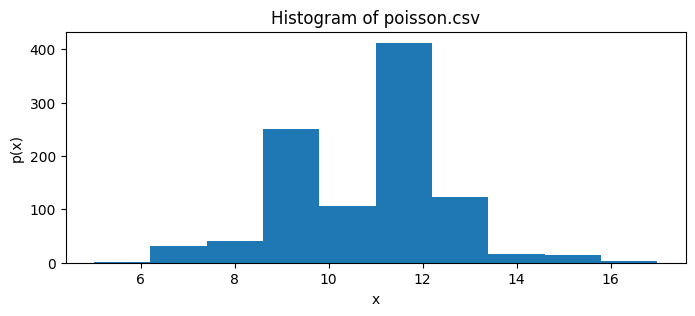

In [33]:
plt.figure(figsize=(8,3))
plt.hist(X)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [34]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [35]:
#test the function
lam_set = np.linspace(1,50,99)
print(X.shape)

print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

(1000,)
lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


In [36]:
lam_set

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5,
       34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. ,
       39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5,
       45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. ])

<h3 style="color:rgb(210,90,80)">Exercise 2 (5 points):</h3>

Implement the `estimator_formula` function returning the analytic solution for lambda-hat

In [37]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""

    lam_max_formula = np.mean(X)
    
    return lam_max_formula

In [38]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(210,90,80)">Exercise 3 (5 points):</h3>

Implement the `estimator_data` function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

In [39]:
def estimator_support(X, lam_set):
    loglikelih = [loglikelihood(X,lami) for lami in lam_set]

    lam_max = lam_set[np.argmax(loglikelih)]

    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)
    
    return loglikelih, ln_min, ln_max, lam_max

In [40]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

Likelihood is maximal at lambda-hat (argmax) =    10.500
Log-Likelihood at this lambda-hat = -2239.852


<h3 style="color:rgb(210,90,80)">Exercise 4 (10 points):</h3>

* Plot the loglikelihood function over `lam_set`
* Mark the maxima in the plot according to `estimator_formula` and `estimator_support`

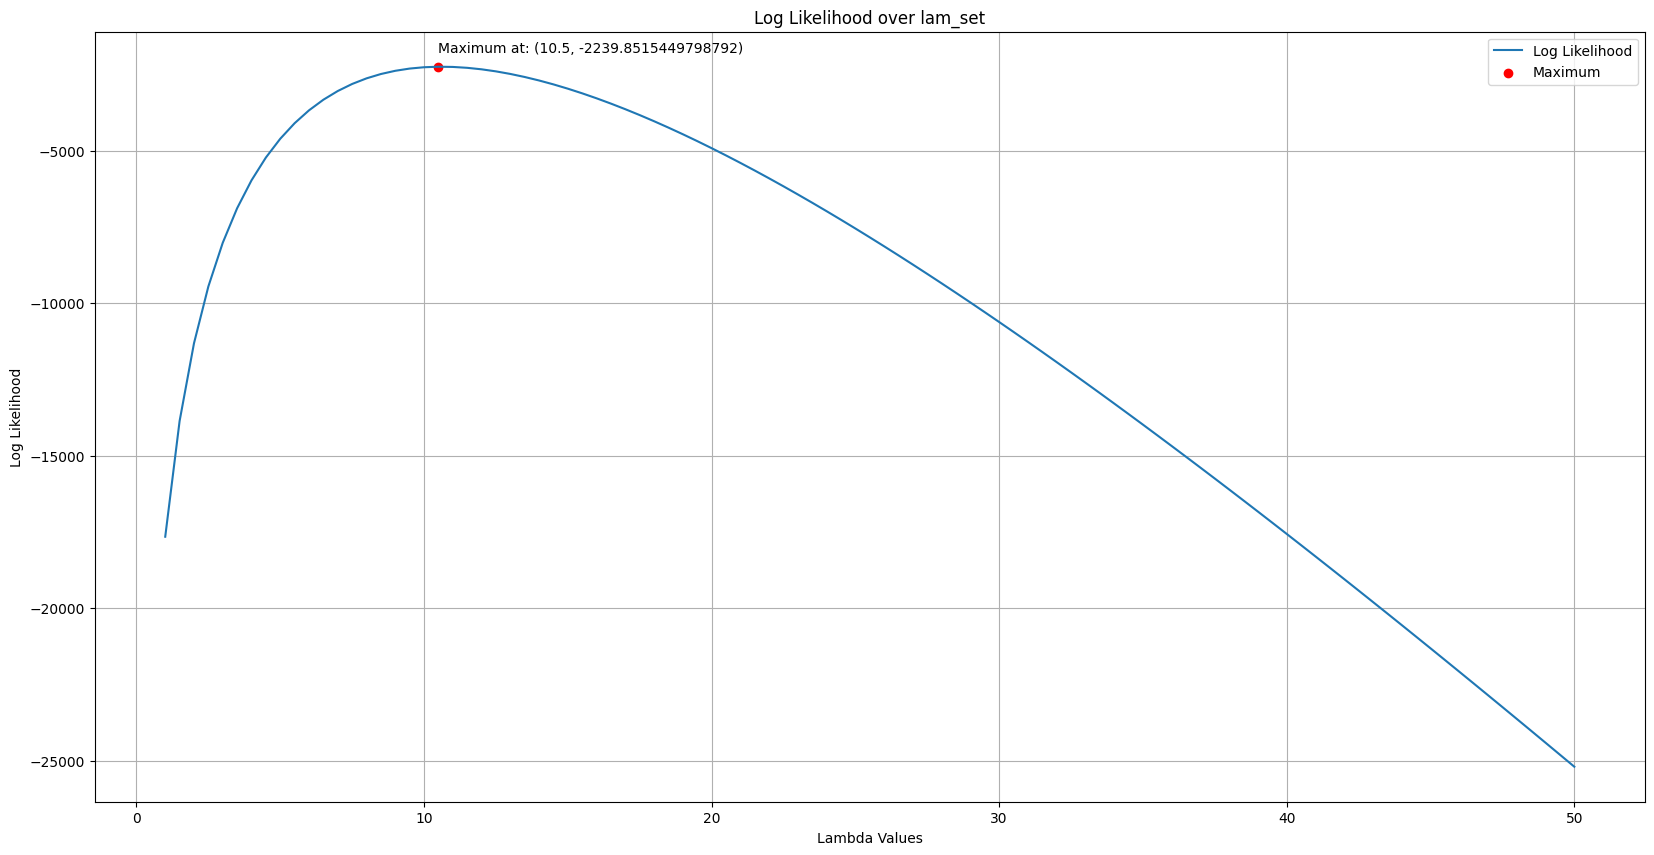

In [57]:
ln_max = loglikelihood(X,lam_max)
plt.figure(figsize=(20, 10))
plt.plot(lam_set, loglikelih, label="Log Likelihood")
plt.scatter(lam_max, ln_max, color='red', label="Maximum")
plt.annotate(f"Maximum at: ({lam_max}, {ln_max})", (lam_max, ln_max), textcoords= "offset points", xytext=(0,10))
plt.xlabel("Lambda Values")
plt.ylabel("Log Likelihood")
plt.title("Log Likelihood over lam_set")
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color:rgb(208,90,80)">Exercise 5 (5 points)</h3>

* Explain and discuss the result in your own words. Where is the maximum?

Maximum is at lambda 10.5, MLE allows us to estimate the probability distribution of the dataset (or fitting a distribution to it).